In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

In [230]:
df = pd.read_excel('middle_tn_schools.xlsx')
# df1 = pd.read_excel('middle_tn_schools.xlsx')

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 347 non-null    object 
 1   school_rating        347 non-null    float64
 2   size                 347 non-null    float64
 3   reduced_lunch        347 non-null    float64
 4   state_percentile_16  347 non-null    float64
 5   state_percentile_15  341 non-null    float64
 6   stu_teach_ratio      347 non-null    float64
 7   school_type          347 non-null    object 
 8   avg_score_15         341 non-null    float64
 9   avg_score_16         347 non-null    float64
 10  full_time_teachers   347 non-null    float64
 11  percent_black        347 non-null    float64
 12  percent_white        347 non-null    float64
 13  percent_asian        347 non-null    float64
 14  percent_hispanic     347 non-null    float64
dtypes: float64(13), object(2)
memory usage: 

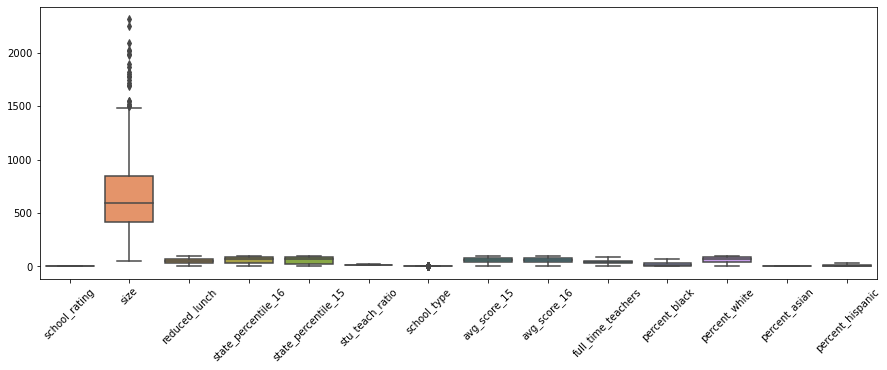

In [125]:
fig = plt.figure(figsize = (15,5))
sns.boxplot(data = df)
plt.xticks(rotation = 45)
plt.show()

In [121]:
le = preprocessing.LabelEncoder()
df['school_type']=le.fit_transform(df['school_type'])  # label Encoder for categorical data.
# pd.get_dummies(df,columns = ['school_type'],drop_first = True)

school_rating


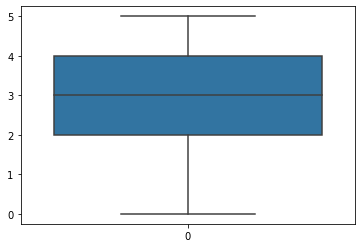

reduced_lunch


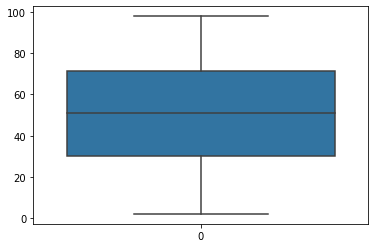

state_percentile_16


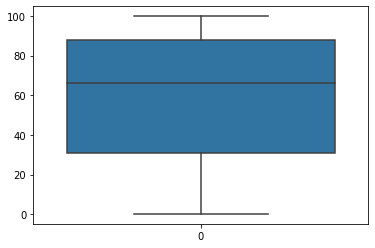

state_percentile_15


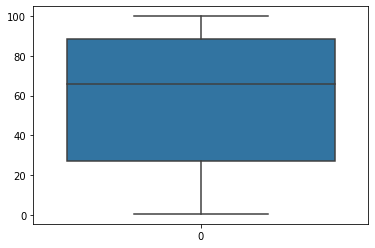

stu_teach_ratio


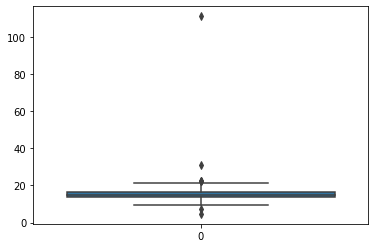

school_type


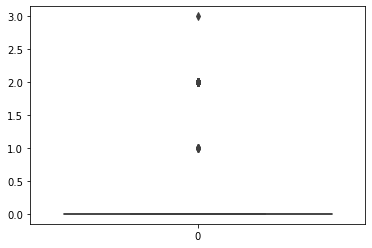

avg_score_15


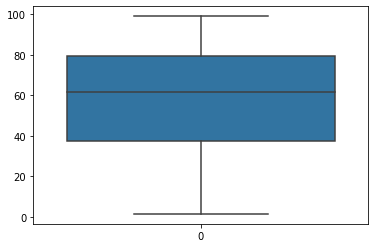

avg_score_16


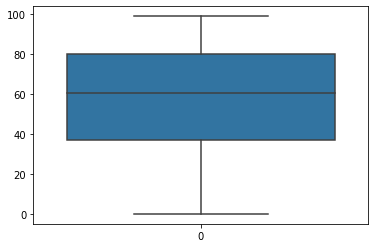

full_time_teachers


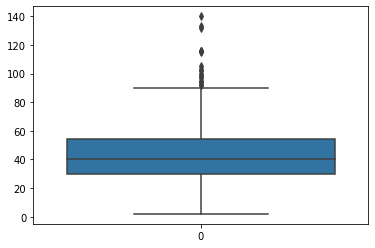

percent_black


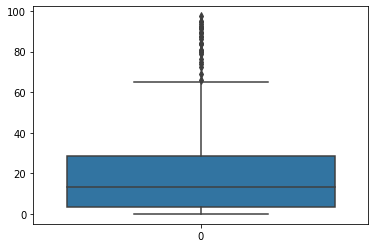

percent_white


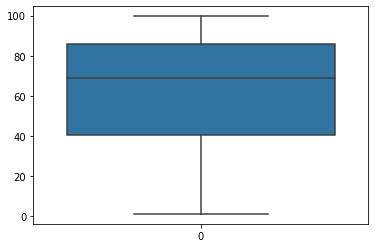

percent_asian


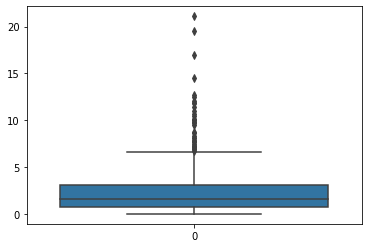

percent_hispanic


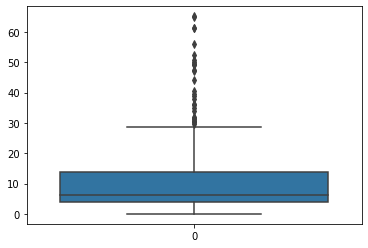

In [122]:
for i in df.drop(['size','name'],axis = 1).columns:
    print(i)
    sns.boxplot(data = df[i])
    plt.show()

In [220]:
def Outlier(data,cols):
    for column in data.drop(cols,axis = 1).columns:
        if data[column].dtype != object:
            Q1 = np.percentile(data[column],25)
            Q3 = np.percentile(data[column],75)
            IQR = Q3-Q1
            lower = Q1 - (1.5*IQR)
            upper = Q3 + (1.5*IQR)
            
            data[column] = data[column].apply(lambda x : upper if x>upper else lower if x<lower else x)
    return data

In [141]:
df2.isna().sum()

name                   0
school_rating          0
size                   0
reduced_lunch          0
state_percentile_16    0
state_percentile_15    0
stu_teach_ratio        0
school_type            0
avg_score_15           0
avg_score_16           0
full_time_teachers     0
percent_black          0
percent_white          0
percent_asian          0
percent_hispanic       0
dtype: int64

In [139]:
df2['state_percentile_15'].fillna(df['state_percentile_15'].mean(),inplace = True)
df2['avg_score_15'].fillna(df['avg_score_15'].mean(),inplace = True)

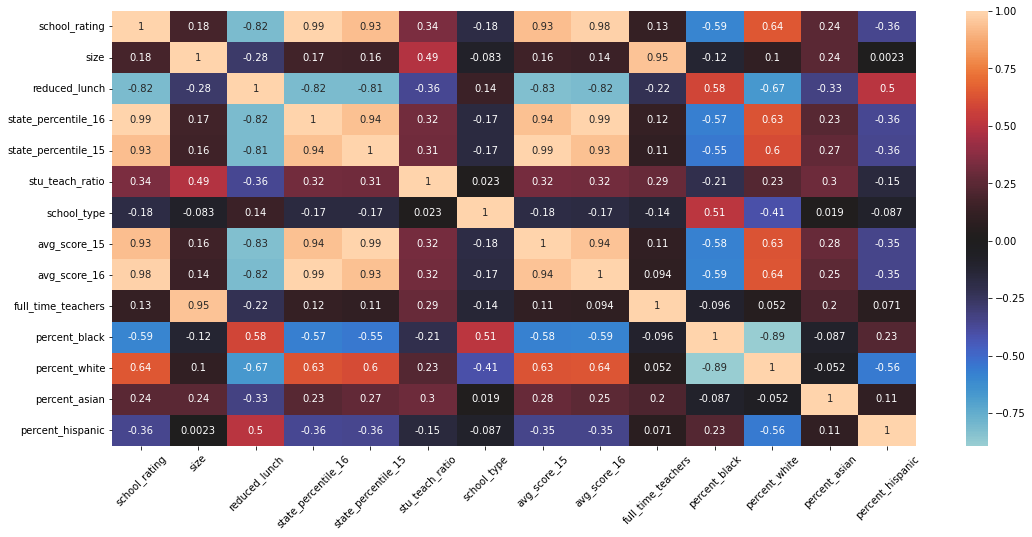

In [142]:
corr = df2.corr()
fig = plt.figure(figsize=(18,8))
ax = sns.heatmap(corr, center = 0, annot=True)
plt.xticks(rotation = 45)
plt.show()

In [168]:
df2.columns

Index(['name', 'school_rating', 'size', 'reduced_lunch', 'state_percentile_16',
       'state_percentile_15', 'stu_teach_ratio', 'school_type', 'avg_score_15',
       'avg_score_16', 'full_time_teachers', 'percent_black', 'percent_white',
       'percent_asian', 'percent_hispanic'],
      dtype='object')

In [173]:
x = df2.drop(['name','size','percent_white','percent_black','avg_score_15','avg_score_16','school_type','state_percentile_16','state_percentile_15','school_rating'],axis = 1)   # independent feature
y = df['size']                    # target

In [174]:
x_train,x_test,y_train,y_test = tts(x,y,test_size = 0.25, random_state = 1)

In [175]:
lm = LinearRegression()

In [176]:
lm.fit(x_train,y_train)

LinearRegression()

In [186]:
y_pred = lm.predict(x_test)
# y_pred

In [185]:
# visualizing prediction

test_results = pd.DataFrame(x_test.copy())
test_results['y_test'] = y_test
test_results['predictions'] = y_pred
test_results

,reduced_lunch,stu_teach_ratio,full_time_teachers,percent_asian,percent_hispanic,y_test,predictions
85,85.0,17.0,87.0,5.200,28.8,1485.0,1563.037348
163,59.0,15.2,90.0,3.100,24.6,1771.0,1532.273870
107,94.0,14.2,59.0,6.625,28.8,842.0,935.633368
105,82.0,16.0,17.0,0.700,0.7,272.0,266.243914
123,29.0,19.8,46.0,6.625,6.2,915.0,933.615542
...,...,...,...,...,...,...,...
249,42.0,17.3,52.0,3.300,2.2,900.0,947.151170
111,74.0,14.4,37.0,2.200,9.3,536.0,552.087063
291,7.0,16.2,48.0,6.625,4.4,779.0,810.196250
51,54.0,14.6,46.0,0.300,4.6,676.0,720.521355


In [217]:
print("MSE: ",metrics.mean_squared_error(y_test,y_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("MAE: ",metrics.mean_absolute_error(y_test,y_pred))
print("MAPE: ",metrics.mean_absolute_percentage_error(y_test,y_pred))
print("Adjusted R2: ",1- (1-metrics.r2_score(y_test,y_pred)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)))
print("R2 score: ",metrics.r2_score(y_test,y_pred))
x_test.shape[1]-1 # columns
print()
print()

Y_train_pred = lm.predict(x_train)
print("MSE: ",metrics.mean_squared_error(y_train,Y_train_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_train,Y_train_pred)))
print("MAE: ",metrics.mean_absolute_error(y_train,Y_train_pred))
print("MAPE: ",metrics.mean_absolute_percentage_error(y_train,Y_train_pred))
print("Adjusted R2: ",1- (1-metrics.r2_score(y_train,Y_train_pred)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)))
print("R2 score: ",metrics.r2_score(y_test,y_pred))
x_test.shape[1]-1 # columns

# Y_train_pred

MSE:  7523.238467571096
RMSE:  86.73660396609436
MAE:  57.121413100842155
MAPE:  0.09745002698769874
Adjusted R2:  1.013353968048726
R2 score:  0.9544380396738001


MSE:  8803.964894781555
RMSE:  93.82944577680055
MAE:  53.75115103011231
MAPE:  0.0999460024766536
Adjusted R2:  1.0026826378796392
R2 score:  0.9544380396738001


4

In [228]:
df[df['school_type'] == 'Public'].head(19)

,name,school_rating,size,reduced_lunch,state_percentile_16,state_percentile_15,stu_teach_ratio,school_type,avg_score_15,avg_score_16,full_time_teachers,percent_black,percent_white,percent_asian,percent_hispanic
0,Allendale Elementary School,5.0,851.0,10.0,90.2,95.8,15.7,Public,89.4,85.2,54.0,2.9,85.5,1.6,5.6
1,Anderson Elementary,2.0,412.0,71.0,32.8,37.3,12.8,Public,43.0,38.3,32.0,3.9,86.7,1.0,4.9
2,Avoca Elementary,4.0,482.0,43.0,78.4,83.6,16.6,Public,75.7,73.0,29.0,1.0,91.5,1.2,4.4
4,Barfield Elementary,4.0,948.0,26.0,85.3,89.2,14.8,Public,81.3,79.6,64.0,11.8,71.2,7.1,6.0
5,Barkers Mill Elementary School,4.0,893.0,48.0,78.1,76.4,13.9,Public,69.4,72.3,64.0,28.6,39.9,2.2,17.8
6,Barksdale Elementary,4.0,580.0,58.0,83.2,74.6,13.8,Public,68.0,76.1,42.0,27.4,59.5,0.5,6.6
7,Beech Elementary,5.0,612.0,16.0,95.2,93.4,15.6,Public,85.9,90.3,39.0,4.2,90.5,0.3,3.1
8,Beech Senior High School,4.0,1274.0,21.0,82.5,77.9,14.9,Public,67.2,69.3,85.0,13.8,79.7,1.4,3.7
11,Benny C. Bills Elementary School,3.0,705.0,67.0,64.6,63.8,13.0,Public,59.9,60.6,54.0,26.0,58.0,0.3,12.9
12,Black Fox Elementary,3.0,830.0,72.0,52.1,62.8,13.8,Public,58.8,50.5,60.0,29.4,36.5,7.3,19.2
